# Requirements

In [ ]:
import pandas as pd

In [2]:
# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [7]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/amazon_stock_price.csv")
df

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400


In [8]:
df = to_time_series(df,time_feature="date")
df

,open,high,low,close,volume
date,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200


Explore the dataset using visualizations of your choice.

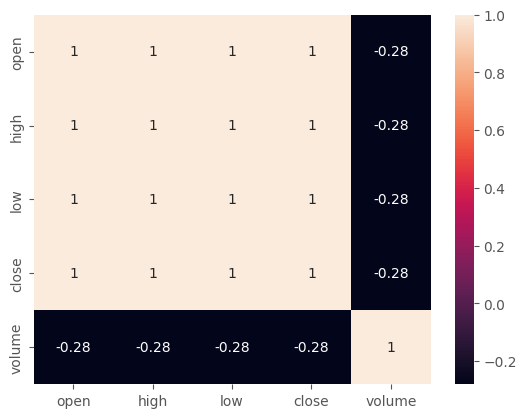

In [18]:
# Write your code here. Add as many boxes as you need.
correlation_map(df)

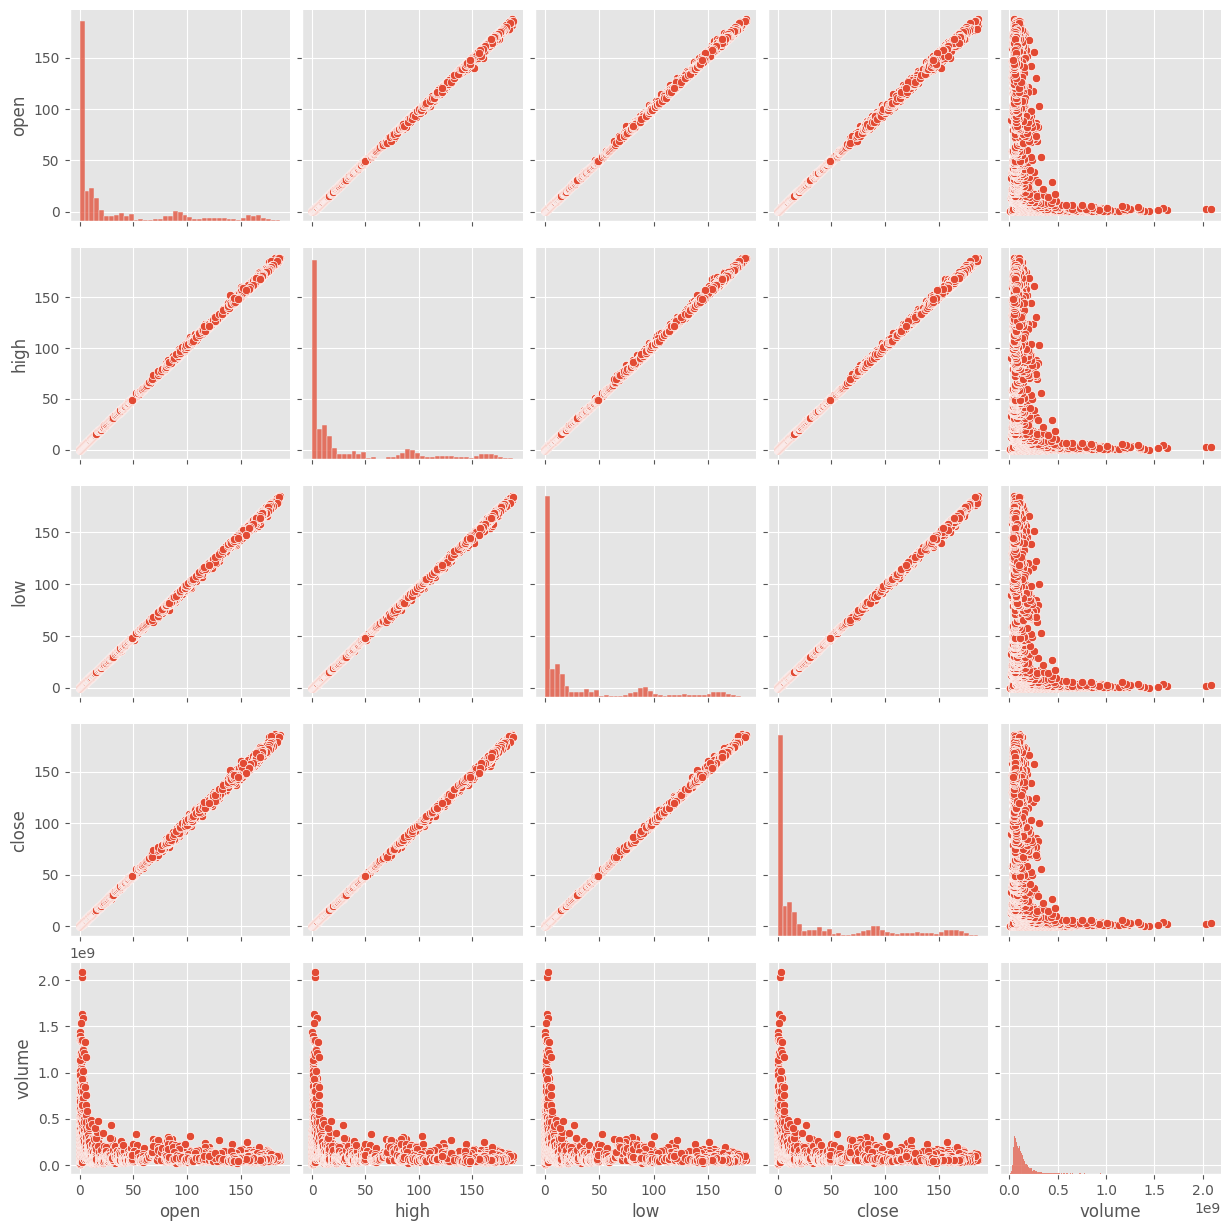

In [19]:
sns.pairplot(df)

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [75]:
# Write your code here. Add as many boxes as you need.
df_copy, features = auto_shift(df, lag=7, features_to_shift=['volume'], auto_drop_na=True)

In [76]:
df_copy

,open,high,low,close,volume,volume_prev_1,volume_prev_2,volume_prev_3,volume_prev_4,volume_prev_5,volume_prev_6,volume_prev_7
date,,,,,,,,,,,,
1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000,318744000.0,235536000.0,377064000.0,109344000.0,122136000.0,294000000.0,1.443120e+09
1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000,173952000.0,318744000.0,235536000.0,377064000.0,109344000.0,122136000.0,2.940000e+08
1997-05-29,0.0771,0.0771,0.0740,0.0753,69456000,91488000.0,173952000.0,318744000.0,235536000.0,377064000.0,109344000.0,1.221360e+08
1997-05-30,0.0750,0.0755,0.0740,0.0750,51888000,69456000.0,91488000.0,173952000.0,318744000.0,235536000.0,377064000.0,1.093440e+08
1997-06-02,0.0755,0.0766,0.0750,0.0755,11832000,51888000.0,69456000.0,91488000.0,173952000.0,318744000.0,235536000.0,3.770640e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000,40610900.0,42711700.0,53762400.0,22378400.0,45669100.0,71226000.0,4.195120e+07
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600,65814000.0,40610900.0,42711700.0,53762400.0,22378400.0,45669100.0,7.122600e+07
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200,39924600.0,65814000.0,40610900.0,42711700.0,53762400.0,22378400.0,4.566910e+07


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [77]:
features

['open',
 'high',
 'low',
 'close',
 'volume_prev_1',
 'volume_prev_2',
 'volume_prev_3',
 'volume_prev_4',
 'volume_prev_5',
 'volume_prev_6',
 'volume_prev_7']

In [78]:
del features[3]

In [79]:
# Write your code here. Add as many boxes as you need.
X = df_copy[features]
Y = df_copy["close"]

In [80]:
X

,open,high,low,volume_prev_1,volume_prev_2,volume_prev_3,volume_prev_4,volume_prev_5,volume_prev_6,volume_prev_7
date,,,,,,,,,,
1997-05-27,0.0755,0.0823,0.0729,318744000.0,235536000.0,377064000.0,109344000.0,122136000.0,294000000.0,1.443120e+09
1997-05-28,0.0812,0.0818,0.0766,173952000.0,318744000.0,235536000.0,377064000.0,109344000.0,122136000.0,2.940000e+08
1997-05-29,0.0771,0.0771,0.0740,91488000.0,173952000.0,318744000.0,235536000.0,377064000.0,109344000.0,1.221360e+08
1997-05-30,0.0750,0.0755,0.0740,69456000.0,91488000.0,173952000.0,318744000.0,235536000.0,377064000.0,1.093440e+08
1997-06-02,0.0755,0.0766,0.0750,51888000.0,69456000.0,91488000.0,173952000.0,318744000.0,235536000.0,3.770640e+08
...,...,...,...,...,...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,40610900.0,42711700.0,53762400.0,22378400.0,45669100.0,71226000.0,4.195120e+07
2023-12-01,146.0000,147.2500,145.5500,65814000.0,40610900.0,42711700.0,53762400.0,22378400.0,45669100.0,7.122600e+07
2023-12-04,145.2500,145.3500,142.8100,39924600.0,65814000.0,40610900.0,42711700.0,53762400.0,22378400.0,4.566910e+07


In [81]:
Y

date
1997-05-27      0.0792
1997-05-28      0.0766
1997-05-29      0.0753
1997-05-30      0.0750
1997-06-02      0.0755
                ...   
2023-11-30    146.0900
2023-12-01    147.0300
2023-12-04    144.8400
2023-12-05    146.8800
2023-12-06    144.5200
Name: close, Length: 6678, dtype: float64

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [118]:
# Write your code here. Add as many boxes as you need.
random_forest_regressor = RandomForestRegressor(random_state=0, max_depth=8, n_estimators=400)
random_forest_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=400, random_state=0)

Use the trained model to make predictions for the test set.

In [119]:
# Write your code here. Add as many boxes as you need.
forest_regressor_predict = random_forest_regressor.predict(x_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [120]:
# Write your code here. Add as many boxes as you need.
regression_report(y_test,forest_regressor_predict)

Regression Report:
Mean Square Error: 1871.6370784173514
R2 Score: -0.8395982834852911


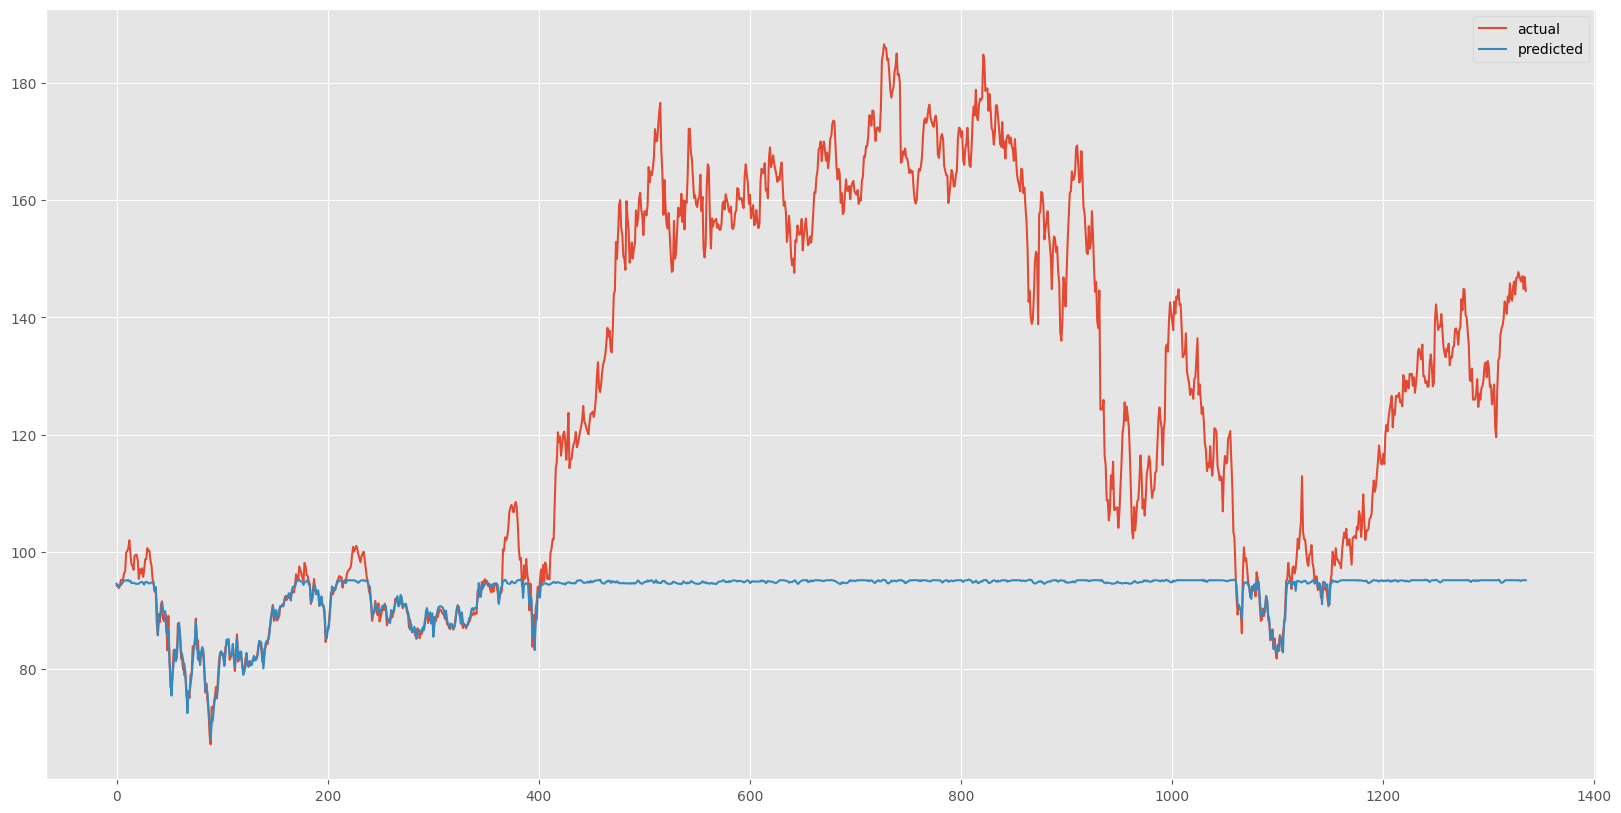

In [121]:
show_time_series_predicts(y_test,forest_regressor_predict)

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [122]:
# Write your code here. Add as many boxes as you need.
xgb_regressor = XGBRegressor(random_state=0, n_estimators=300)
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

Use the trained model to make predictions for the test set.

In [123]:
# Write your code here. Add as many boxes as you need.
xgb_regressor_predict = xgb_regressor.predict(x_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [124]:
# Write your code here. Add as many boxes as you need.
regression_report(y_test,xgb_regressor_predict)

Regression Report:
Mean Square Error: 2081.0377763560323
R2 Score: -1.0454144478104572


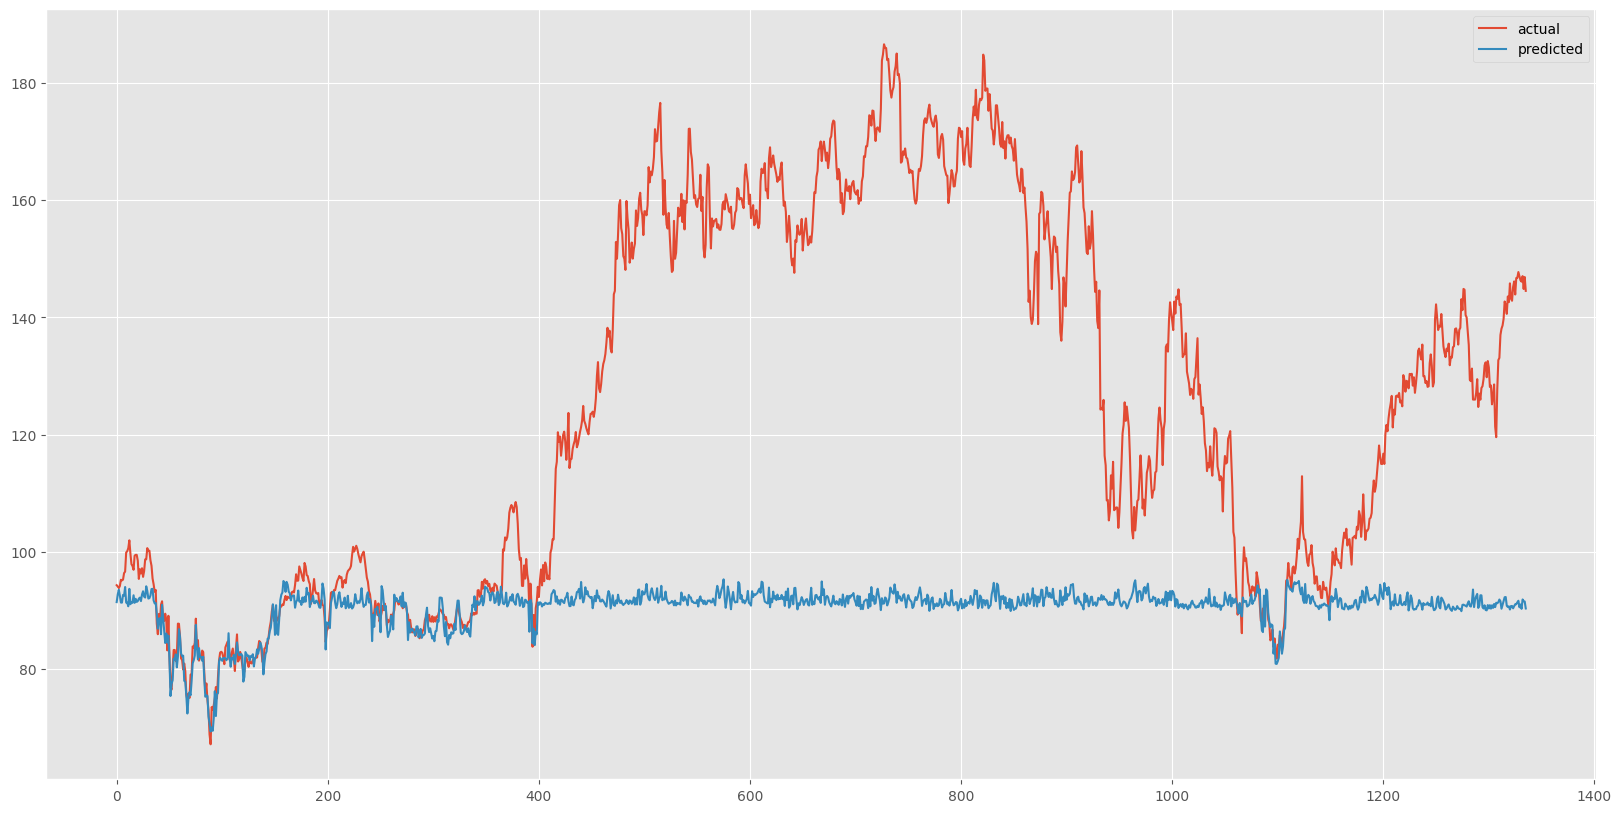

In [125]:
show_time_series_predicts(y_test,xgb_regressor_predict)